In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [ ]:
# load music only data
data_d = '/scratch/gpfs/ij9216/projects/data/misc/youNiverse/data'
df_sb_f = pd.read_csv(f"{data_d}/df_timeseries_music.tsv.gz", compression="infer", sep="\t")
df_ch_f = pd.read_csv(f"{data_d}/df_channels_music.tsv.gz", compression="infer", sep="\t")
df_vd_f = pd.read_feather(f"{data_d}/yt_metadata_helper_music.feather")
num_comments = pd.read_csv(f"{data_d}/num_comments_music.tsv.gz", compression="infer", sep="\t")
df_vd_f = df_vd_f.merge(num_comments, on='display_id', how='left')


## All columns in all dfs:
- Timeseries (df_sb_f): ['channel', 'category', 'datetime', 'views', 'delta_views', 'subs', 'delta_subs', 'videos', 'delta_videos', 'activity']
- Channels (df_ch_f): ['category_cc', 'join_date', 'channel', 'name_cc', 'subscribers_cc', 'videos_cc', 'subscriber_rank_sb', 'videos_yt']
- Videos (df_vd_f): ['categories', 'channel_id', 'dislike_count', 'display_id', 'duration','like_count', 'upload_date', 'view_count', 'dummmy']
- Comments (num_comments): ['display_id', 'num_comms']
- Comment authors (num_comments_authors): ['author', 'video_id']

In [21]:
# things to get: comments per video, videos per channel (histograms)
# add num_comments[num_comms] to df_vd_f
# hist 1: df_ch_f['videos_cc']
# hist 2: num_comments['num_comms']
# scatters: all pairwise combinations of df_vd_f['num_comments'], df_vd_f['like_count'] and df_vd_f['view_count']
# num of channels: 
print(f"number of channels: {df_ch_f['channel'].nunique()}")
print(f"number of videos: {df_vd_f['display_id'].nunique()}")
print("------------------------------")
# get videos_cc quantiles 0.1, 0.25, 0.5, 0.75, 0.9
print("Videos per channel quantiles:")
print(df_ch_f['videos_cc'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.99]))
print("------------------------------")
# print nunber of comments
print(f"total number of comments: {num_comments['num_comms'].sum()}")
# print("Number of comments quantiles:")
print(num_comments['num_comms'].quantile([0.1, 0.25, 0.5, 0.75, 0.9, 0.99]))
print("------------------------------")

# print(df_ch_f['videos_cc'].sort_values(ascending=False).head(50))

number of channels: 29166
number of videos: 8305003
------------------------------
Videos per channel quantiles:
0.10      23.00
0.25      46.00
0.50     111.00
0.75     293.00
0.90     751.00
0.99    5026.25
Name: videos_cc, dtype: float64
------------------------------
total number of comments: 937841945.0
0.10       0.0
0.25       0.0
0.50       4.0
0.75      23.0
0.90      97.0
0.99    1473.0
Name: num_comms, dtype: float64
------------------------------


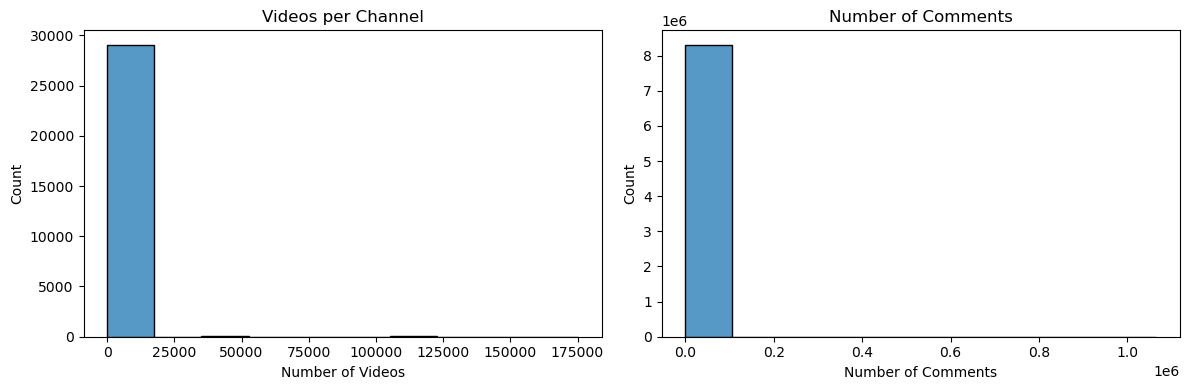

In [10]:
# --- Figure 1: Two histograms ---
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Histogram 1: Number of videos per channel
sns.histplot(df_ch_f['videos_cc'].dropna(), bins=10, ax=axs[0])
axs[0].set_title('Videos per Channel')
axs[0].set_xlabel('Number of Videos')
axs[0].set_ylabel('Count')

# Histogram 2: Number of comments
sns.histplot(num_comments['num_comms'].dropna(), bins=10, ax=axs[1])
axs[1].set_title('Number of Comments')
axs[1].set_xlabel('Number of Comments')
axs[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# --- Figure 2: Pairwise scatter plots ---
cols = ['num_comments', 'like_count', 'view_count']
sns.pairplot(df_vd_f[cols].dropna(), kind='scatter', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Scatter Plots: Comments, Likes, Views', y=1.02)
plt.show()